<a href="https://colab.research.google.com/github/eliassalazarb/FisicaComputacional1/blob/main/Actividad8/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ACTIVIDAD 8**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint

**Ejercicio 1**


Resuelva la ecuación diferencial del oscilador de Van der Pol

$$\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}$$
Reenombramos$$\begin{equation*}
v=\frac{dx}{dt}
\end{equation*}$$

Entonces:$$\begin{equation*}
\frac{dv}{d t}- \mu (1 - x^2)v + x = 0
\end{equation*}$$

Despejamos dv/dt

$$\begin{equation*}
\frac{dv}{dt} = \mu (1 - x^2)v - x 
\end{equation*}$$
donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal.

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

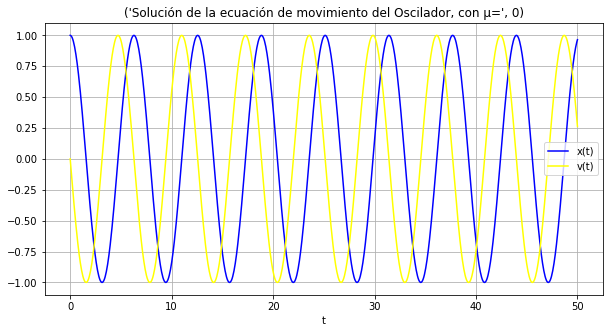

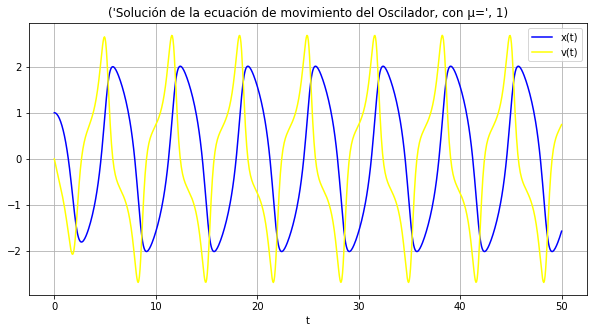

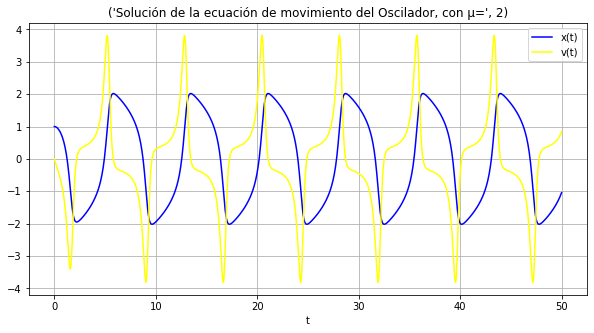

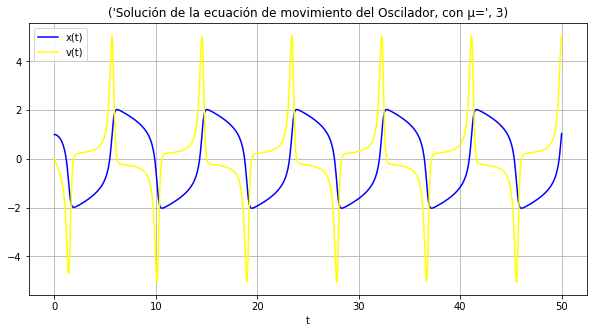

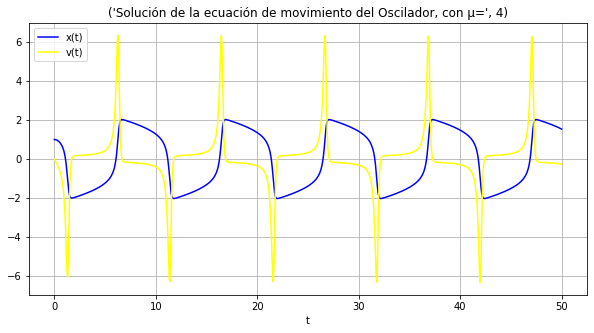

In [ ]:
#Definimos la función F(t,y)
#Siendo este el lado derecho de la ecuacion diferencial
#Para ello despejamos la segunda derivada d^2x/dt^2, la cual reenombramos como dvdt
#dvdt es un arreglo
#Reenombramos a dx/dt como v
def VanDerPol(y,t,u):
        x, v = y
        dvdt = [v, u*(1 - x**2)*v - x]
        return dvdt


#Definimos las condiciones iniciales 
#tiempo inicial es 0.0
t_0 = 0.0
#velocidad incial es [1.0,0.0]
v_0 = [1.0, 0.0]
     
#Definimos el tiempo de integración
#Este con un intervalo de [0,50] 
#Integración con 800 puntos
t = np.linspace(0, 50, 800)

#Definimos los errores de tolerancia para la solución
abserr = 1.0e-10
relerr = 1.0e-8

#Definimos los valores de u (μ) para 0,1,2,3,4
#Realizamos las 4 gráficas mediante un for
for u in range(5):
  y=odeint(VanDerPol, v_0, t, args=(u,), atol=abserr, rtol=relerr)
  #x(t)
  y1=y[:,0]
  #v(t)
  y2=y[:,1] # v(t)
  plt.figure(figsize=(10,5))
  plt.plot(t, y1, 'blue', label='x(t)')
  plt.plot(t, y2, 'yellow', label='v(t)')
  plt.legend(loc='best')
  plt.title(('Solución de la ecuación de movimiento del Oscilador, con μ=' , u))
  plt.xlabel('t')
  plt.grid()
  plt.show()

**Ejercicio 2**

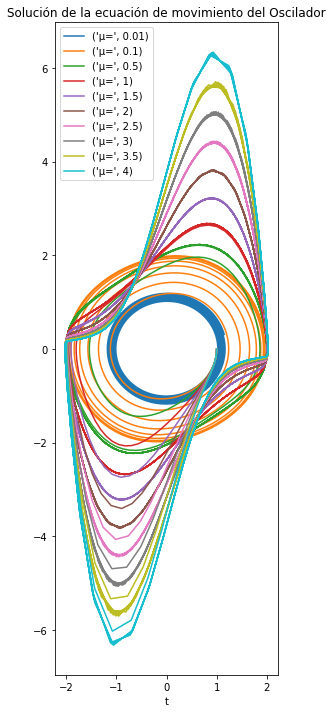

In [ ]:
#Definimos la función F(t,y)
#Siendo este el lado derecho de la ecuacion diferencial
#Para ello despejamos la segunda derivada d^2x/dt^2, la cual reenombramos como dydt
#dy/dt es un arreglo
#Reenombramos a dx/dt como v
def Oscilador(y,t,u):
        x, v = y
        dydt = [v, u*(1 - x**2)*v - x]
        return dydt

#Definimos el tiempo de integración
#Este con un intervalo de [0,30] 
#Integración con 800 puntos
t = np.linspace(0,30,800) 

#Definimos las condiciones iniciales 
#tiempo inicial es 0.0
t_0 = 0.0
#velocidad incial es [1.0,0.0]
v_0 = [1.0, 0.0]

#Definimos el tiempo de integración
#Este con un intervalo de [0,50] 
#Integración con 800 puntos
t = np.linspace(0, 50, 800)

#Definimos los errores de tolerancia para la solución
abserr = 1.0e-10
relerr = 1.0e-8
plt.figure(figsize=(4,12))

#Nuestros valores de μ de interés son obtenidos a partir de la gráfica mostrada anteriormente
#Dicha gráfica fue obtenida de wikipedia
for u in [0.01,0.1,0.5,1,1.5,2,2.5,3,3.5,4]:
  y=odeint(Oscilador, v_0, t, args=(u,), atol=abserr, rtol=relerr)
  #x(t)
  y1=y[:,0] 
  #v(t)
  y2=y[:,1]
  plt.plot(y1, y2, label=('μ=',u))
  plt.legend(loc='best')
  plt.title(('Solución de la ecuación de movimiento del Oscilador'))
  plt.xlabel('t')
  plt.grid()
plt.show()

**Ejercicio 3**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:

1. Método de Euler
2. Método de Runge-Kutta RK4
3. Función scipy.integrate.odeint ó scipy.integrate-solve_ivp


\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0) = 0, \ \frac{dx}{dt}(0) = 0, \ k>0  
\end{equation*}

Reenombramos$$\begin{equation*}
v=\frac{dx}{dt}
\end{equation*}$$

Entonces:$$\begin{equation*}
\frac{dv}{dt} + k (v)^2 -g = 0
\end{equation*}$$

Despejamos dv/dt

$$\begin{equation*}
\frac{dv}{dt} = - k (v)^2 +g 
\end{equation*}$$
Grafique las soluciones como funciones del tiempo.

In [ ]:
#Definimos la función F(t,y)
#Siendo este el lado derecho de la ecuacion diferencial
#Para ello despejamos la segunda derivada d^2x/dt^2, la cual reenombramos como dydt
#dydt es un arreglo
#Reenombramos a dx/dt como v

def CL(y, t, k, g):
        x, v = y
        dvdt = [v, -k*v**2 + g]
        return dvdt
#Definimos el tiempo de integración
#Este con un intervalo de [0,50] 
#Integración con 800 puntos
t = np.linspace(0, 50, 800)

#Definimos nuestras condiciones iniciales
t0 = 0.0
x0 = 0.0
v0 = 0

#Definimos los valores de nuestras constantes
k = 1
g = 9.81

Metodo de Euler

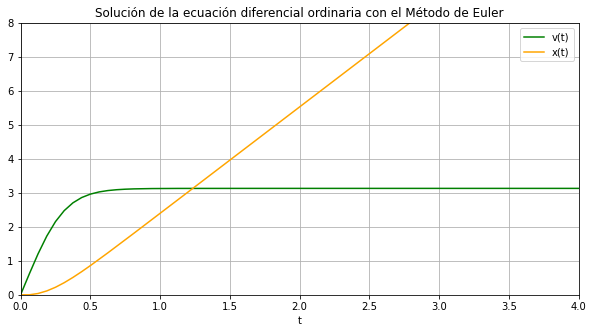

In [ ]:
#Para la primera ecuación
f = lambda v,t: -k*v**2 + g 

#Vector cero para la velocidad
v = np.zeros(len(t))
v[0] = v0

#Vector cero para la posición
x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'green', t,x,'orange')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Euler')
plt.axis([0,4,0,8])
plt.grid()
plt.xlabel('t')
plt.show()

Método de Runge-Kutta

In [ ]:
#RK4, Runge-Kutta de 4 pasos
def RK(f, x0, y0, h):
    k0 = f(x0, y0)
    k1 = f(x0 + h/2, y0 + h/2 * k0)
    k2 = f(x0 + h/2, y0 + h/2 * k1)
    k3 = f(x0 + h, y0 + h * k2)
#Donde para las ecuaciones diferenciales ordinarias tenemos que:
    k = 1/6 * (k0 + 2.0*k1 + 2.0*k2 + k3)
    x1 = x0 + h
    y1 = y0 + h * k
    return x1, y1

#Calculamos h, siendo nuestros límites
a = 0.0
b = 2.0 
#Con una cantidad de puntos:
P = 50
h = (b-a)/P

#Definimos nuestras condiciones iniciales
t0 = 0.0
x0 = 0.0
v0 = 0.0

#Definimos los valores de nuestras constantes
t=0.0
v=0.0
t_values.clear()
v_values.clear()


#Resolución de la primera ecuacióon
f = lambda t,v: -k*v**2 + g 
t_values = [t0]
v_values = [v0]

for _ in range(P):
  t, v = RK(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

#Resolución de la segunda ecuación
#NOTAMOS QUE NO TENEMOS UNA SEGUNDA ECUACIÓN QUE DEPENDA DE X Y T.
#PERO.. conocemos algunos puntos discretos de v
#Por lo que optamos por utilizar la función solve_ivp para la resolución

#Definimos la función F(t,y)
#Siendo este el lado derecho de la ecuacion diferencial
def ED(t,y,k,g):
      dvdt = [y[1], -k*(y[1])**2 + g]
      return dvdt

#Definimos nuestras condiciones iniciales
y00 = [x0, v0]

#Definimos el tiempo de integración
t = np.linspace(a,b,P)

R = solve_ivp(lambda t, y, mu: ED(t, y, k, g),(a,b), y0=y00, method='RK45', t_eval=t, args=(u,), rtol=relerr, atol=abserr)
x=R.y[0]

#Graficamos la solución
plt.figure(figsize=(10,5))
plt.plot(t_values,v_values,'purple', label='v(t)')
plt.plot(t,x,'blue', label='x(t)')
plt.legend(loc='best')
plt.grid()
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Runge-Kutta')
plt.xlabel('t')
plt.show()

NameError: ignored

Función scipy.integrate.odeint

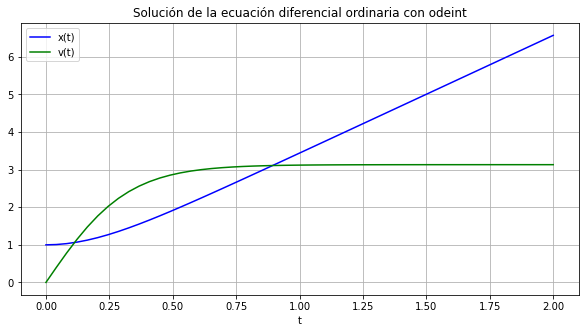

In [ ]:
#Definimos el tiempo de integración
t = np.linspace(a,b,P)

#Definimos las condiciones iniciales 
a0 = [1.0, 0.0]

y=odeint(CL, a0, t, args=(k,g), atol=abserr, rtol=relerr)

#x(t) 
y1=y[:,0]
#v(t)
y2=y[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'blue', label='x(t)')
plt.plot(t, y2, 'green', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()


$$\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}$$
Reenombramos$$\begin{equation*}
v=\frac{dy}{dx}
\end{equation*}$$

Entonces:$$\begin{equation*}
\frac{dv}{dt} + \frac{2}{x} v + y^5 =0
\end{equation*}$$

Despejamos dv/dt

$$\begin{equation*}
\frac{dv}{dt} = - \frac{2}{x} v - y^5
\end{equation*}$$
Grafique las soluciones como funciones del tiempo.

Método de Odeint

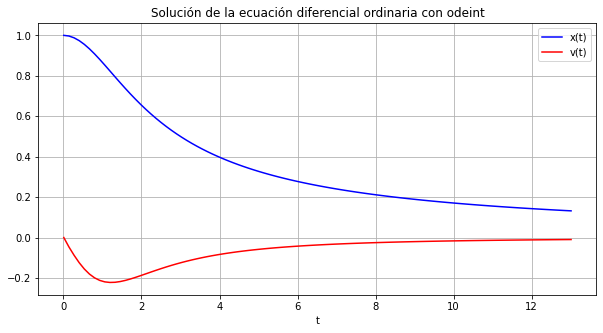

In [ ]:
#HACEMOS USO DE LA FUNCIÓN scipy.integrate.odeint

#Definimos la ecuación:
#Renombramos a dv/dt como dadt
def F(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx
#Condiciones iniciales
a00 = [1.0, 0.0]
#Definimos la x de integración
x = np.linspace(0.01, 13.01, 100)

R=odeint(F, a00, x, atol=abserr, rtol=relerr)

# La solución regresa ambas x(t) y v(t)
y1=R[:,0]
y2=R[:,1]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'b', label='x(t)')
plt.plot(x, y2, 'r', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

$$\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}$$
Reenombramos$$\begin{equation*}
v=\frac{dy}{dx}
\end{equation*}$$

Entonces:$$\begin{equation*}
\frac{dv}{dx} = (x-1)^2 + y^2 + v -2
\end{equation*}$$

Grafique las soluciones como funciones del tiempo.

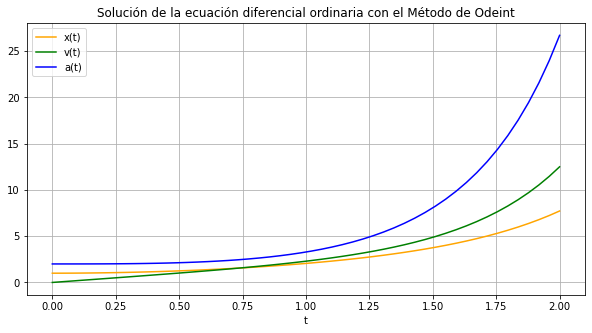

In [ ]:
# Primero definimos la ecuación:
def FO(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx

#Definimos las condiciones iniciales 
P=50
x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 2.0
a00 = [y0, v0, a0]
#Def
x = np.linspace(x0, a0, P)
#La solución de la forma:
R=odeint(FO, a00, x, atol=abserr, rtol=relerr)

#La solución regresa ambas x(t) y v(t)
y1=R[:,0]
y2=R[:,1]
y3=R[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'orange', label='x(t)')
plt.plot(x, y2, 'green', label='v(t)')
plt.plot(x, y3, 'blue', label='a(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Odeint')
plt.xlabel('t')
plt.grid()
plt.show()
